Project: Simulated Momentum Strategy on Asset Prices
Step 1: Generate simulated asset price data for 10 assets over 100 days.
Step 2: Calculate daily returns for each asset.
Step 3: Apply a moving average to smooth the returns and determine a momentum signal.
Step 4: Create a trading rule to "buy" assets with a positive momentum signal and "sell" those with a negative signal.
Step 5: Calculate the portfolio's performance based on this strategy.

Final portfolio value: 1332.0459911070518


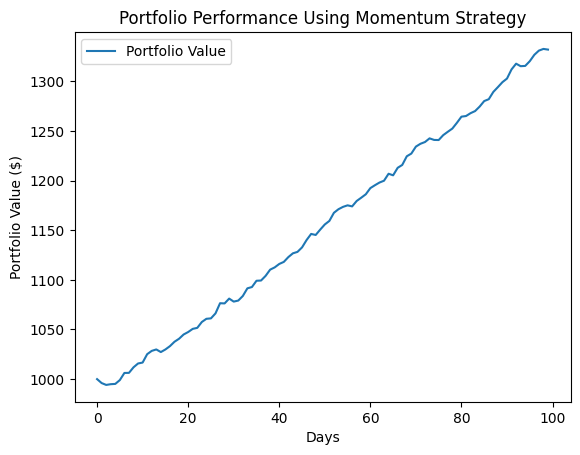

In [2]:
import numpy as np
import pandas as pd

# Step 1: Generate Simulated Data
np.random.seed(0)  # For reproducibility
days = 100
assets = 10

# Generate random price changes for 10 assets over 100 days, starting from a price of 100
price_changes = np.random.normal(0, 1, (days, assets))  # Random daily changes
prices = 100 + np.cumsum(price_changes, axis=0)  # Simulated prices based on cumulative returns

# Convert to a DataFrame for easier handling
price_data = pd.DataFrame(prices, columns=[f'Asset_{i+1}' for i in range(assets)])

# Step 2: Calculate Daily Returns
returns = price_data.pct_change().fillna(0)  # Daily percentage returns

# Step 3: Calculate a 5-day Moving Average of Returns to Signal Momentum
momentum_signal = returns.rolling(window=5).mean()

# Step 4: Create Trading Rules
# Buy if momentum signal > 0, otherwise sell (represented as -1 for sell, 1 for buy, 0 for hold)
trade_signals = np.where(momentum_signal > 0, 1, -1)  # 1 = Buy, -1 = Sell

# Step 5: Calculate Portfolio Performance Based on Strategy
# Assume equal allocation at the start and adjust daily based on signals
portfolio_returns = (returns * trade_signals).mean(axis=1)  # Average across assets

# Calculate cumulative portfolio value, starting with an initial investment of $1,000
initial_investment = 1000
portfolio_value = initial_investment * (1 + portfolio_returns.cumsum())

# Print Results
print("Final portfolio value:", portfolio_value.iloc[-1])

# Plot the Portfolio Performance
import matplotlib.pyplot as plt

plt.plot(portfolio_value, label="Portfolio Value")
plt.xlabel("Days")
plt.ylabel("Portfolio Value ($)")
plt.title("Portfolio Performance Using Momentum Strategy")
plt.legend()
plt.show()